In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Assignment!

In [2]:
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
# reading CSV file into field descrptor
fd_4g = pd.read_csv('Data/4G_Passive_measurements.csv')
print(fd_4g.head(10))

#fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
#print(fd_5g.head(10))


   Unnamed: 0        Date          Time           UTC   Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  eNodeB.ID  Power   SINR   RSRP   RSRQ scenario  cellLongitude  cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities    distance  Band                 campaign
0      231098  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  412  "Op"[1]      76860425     300236 -54.38   6.70 -78.68 -19.41       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
1      241306  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  411  "Op"[1]      76860427     300236 -52.63   5.18 -75.54 -16.26       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
2      291097  14.01.2021  09:19:28.840 

In [3]:
grouped_by_operator = fd_4g.groupby('MNC')
signal_quality_columns = ['RSRP', 'RSRQ', 'SINR']
summary_stats = grouped_by_operator[signal_quality_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics for each operator
print(summary_stats)


               RSRP                         RSRQ                       SINR                  
               mean median        std       mean median       std      mean median        std
MNC                                                                                          
"Op"[1] -100.161485 -98.98  15.604314 -20.280126 -19.29  5.536481  0.833658   2.23  11.473351
"Op"[2]  -98.142377 -99.16  12.642518 -20.498862 -19.74  5.272834  0.932823   3.17   9.833226


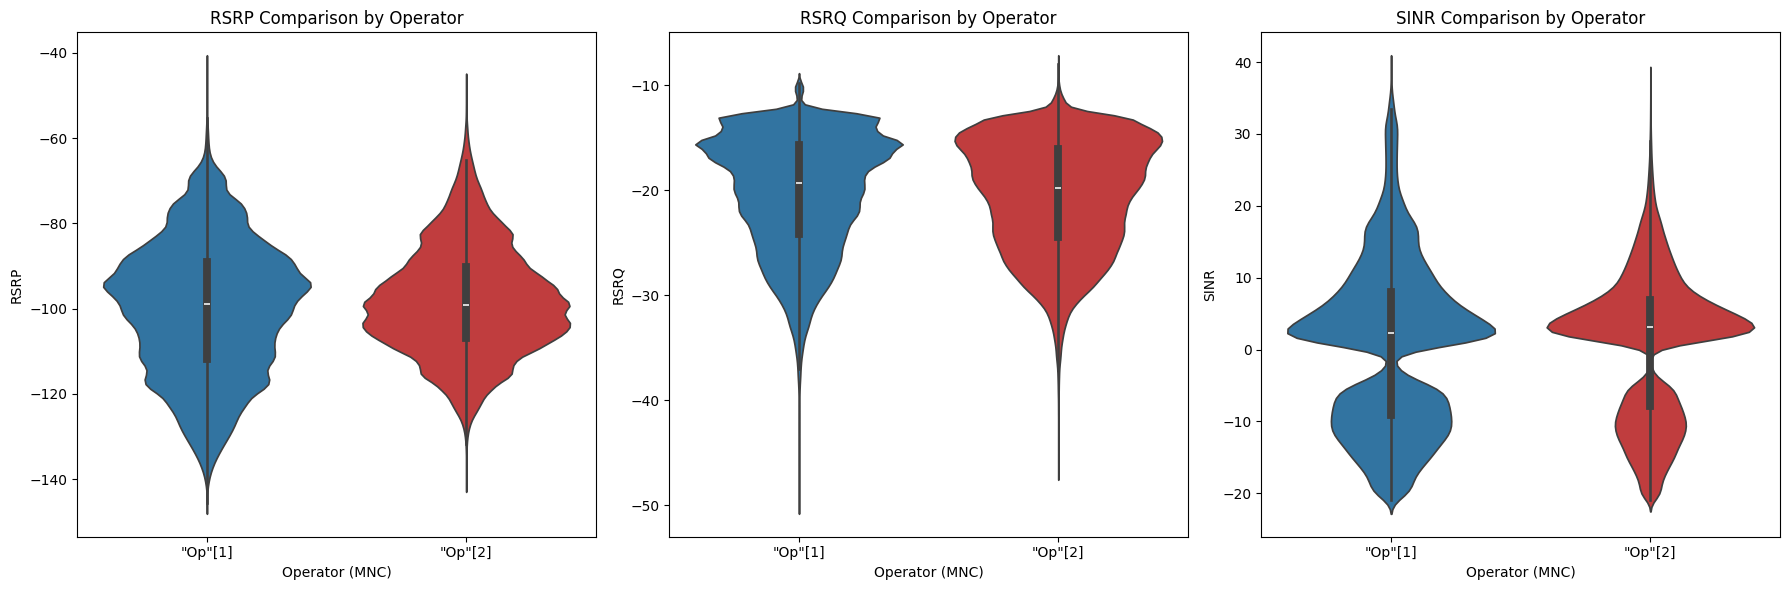

In [4]:
# Create a custom color palette (Blue for "Op"[1], Red for "Op"[2])
custom_palette = {"\"Op\"[1]": "#1f77b4", "\"Op\"[2]": "#d62728"}  # Blue for "Op"[1], Red for "Op"[2]

# Create subplots for RSRP, RSRQ, and SINR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Violin plot for RSRP
sns.violinplot(x='MNC', y='RSRP', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[0])
axes[0].set_title('RSRP Comparison by Operator')
axes[0].set_xlabel('Operator (MNC)')
axes[0].set_ylabel('RSRP')

# Violin plot for RSRQ
sns.violinplot(x='MNC', y='RSRQ', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[1])
axes[1].set_title('RSRQ Comparison by Operator')
axes[1].set_xlabel('Operator (MNC)')
axes[1].set_ylabel('RSRQ')

# Violin plot for SINR
sns.violinplot(x='MNC', y='SINR', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[2])
axes[2].set_title('SINR Comparison by Operator')
axes[2].set_xlabel('Operator (MNC)')
axes[2].set_ylabel('SINR')

# Adjust layout
plt.tight_layout()
plt.show()

## Summary of Violin Plots for Signal Metrics

### 1. **RSRP (Reference Signal Received Power) Comparison**
   - **RSRP** measures the power of the received signal (in dBm). Lower values indicate weaker signals (closer to -140 dBm), while higher values indicate stronger signals (closer to -60 dBm).
   - **Observations:**
     - Both operators show similar distributions, with most values ranging between -140 dBm and -60 dBm.
     - **Operator 1 ("Op"[1])** has slightly stronger signals on average compared to **Operator 2 ("Op"[2])**, as indicated by the thicker distribution around -100 dBm for Operator 1 and a thinner one for Operator 2.

### 2. **RSRQ (Reference Signal Received Quality) Comparison**
   - **RSRQ** measures the quality of the signal, considering factors like interference and noise (in dB). Lower values indicate poorer quality.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows better signal quality on average, with RSRQ values centered around -10 to -20 dB.
     - **Operator 2 ("Op"[2])** has a similar distribution but with slightly more data spread out towards lower quality values (between -20 and -40 dB).

### 3. **SINR (Signal to Interference and Noise Ratio) Comparison**
   - **SINR** measures the ratio of signal to interference and noise (in dB). Higher values indicate cleaner, stronger signals with less interference.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows a higher SINR range, typically between 0 and 30 dB, indicating better signal quality with less interference.
     - **Operator 2 ("Op"[2])** has lower SINR values, ranging from -10 to 20 dB, indicating more interference and lower signal quality on average.

---

### Key Takeaways
- **RSRP (Signal Strength):** Both operators have similar signal strength, but **Operator 1 ("Op"[1])** has a slightly stronger distribution.
- **RSRQ (Signal Quality):** **Operator 1** shows better signal quality compared to **Operator 2**, with values concentrated closer to 0 dB.
- **SINR (Signal to Interference and Noise Ratio):** **Operator 1** provides better overall signal quality with less interference, while **Operator 2** experiences more interference and lower SINR values.


# RSRP For Different Scenarios (OW,IS,OD) For Both Operators

C:\Users\elmir\AppData\Local\Temp\ipykernel_22616\956685114.py:24: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(
C:\Users\elmir\AppData\Local\Temp\ipykernel_22616\956685114.py:44: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(


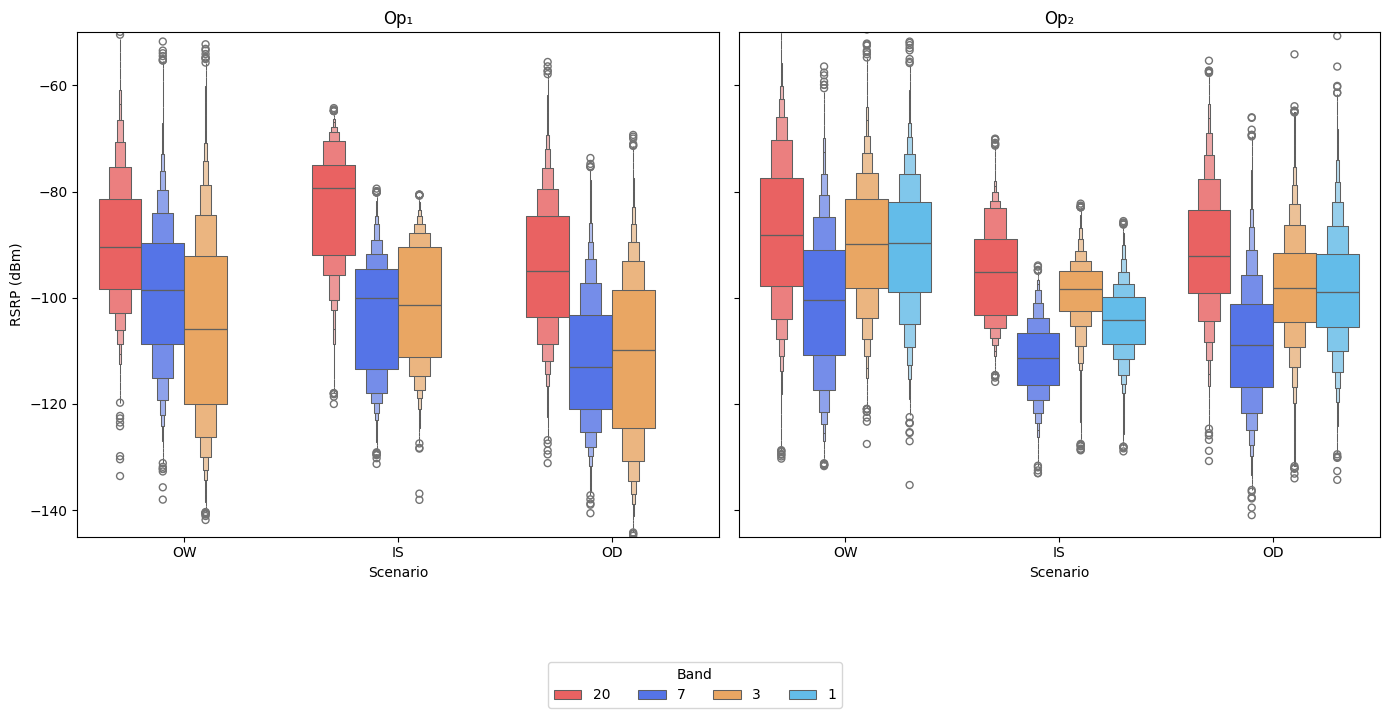

In [5]:
# Extract the numeric part of the MNC field by using string manipulation
fd_4g['MNC_numeric'] = fd_4g['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
fd_4g['MNC_numeric'] = pd.to_numeric(fd_4g['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

hue_order = [20, 7, 3, 1]

# Set up the exact color palette, now including Band 1

palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Operator 1 (Op1)
sns.boxenplot(
    x='scenario',
    y='RSRP',
    hue='Band',
    data=op1_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[0]
)
axes[0].set_title('Op₁')
axes[0].set_ylabel('RSRP (dBm)')
axes[0].set_xlabel('Scenario')

# Remove the legend from this plot
axes[0].get_legend().remove()

# Plot for Operator 2 (Op2) - Note that Band 1 should now appear here
sns.boxenplot(
    x='scenario',
    y='RSRP',
    hue='Band',
    data=op2_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[1]
)
axes[1].set_title('Op₂')
axes[1].set_ylabel('RSRP (dBm)')
axes[1].set_xlabel('Scenario')

# Remove the legend from this plot as well
axes[1].get_legend().remove()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

# Set y-axis limits to match the scaling in your reference image
axes[0].set_ylim(-145, -50)  # Adjust to match the RSRP scale
axes[1].set_ylim(-145, -50)

plt.tight_layout()
plt.show()

# SINR For Different Scenarios (OW,IS,OD) For Both Operators

C:\Users\elmir\AppData\Local\Temp\ipykernel_22616\73690476.py:22: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(
C:\Users\elmir\AppData\Local\Temp\ipykernel_22616\73690476.py:42: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(


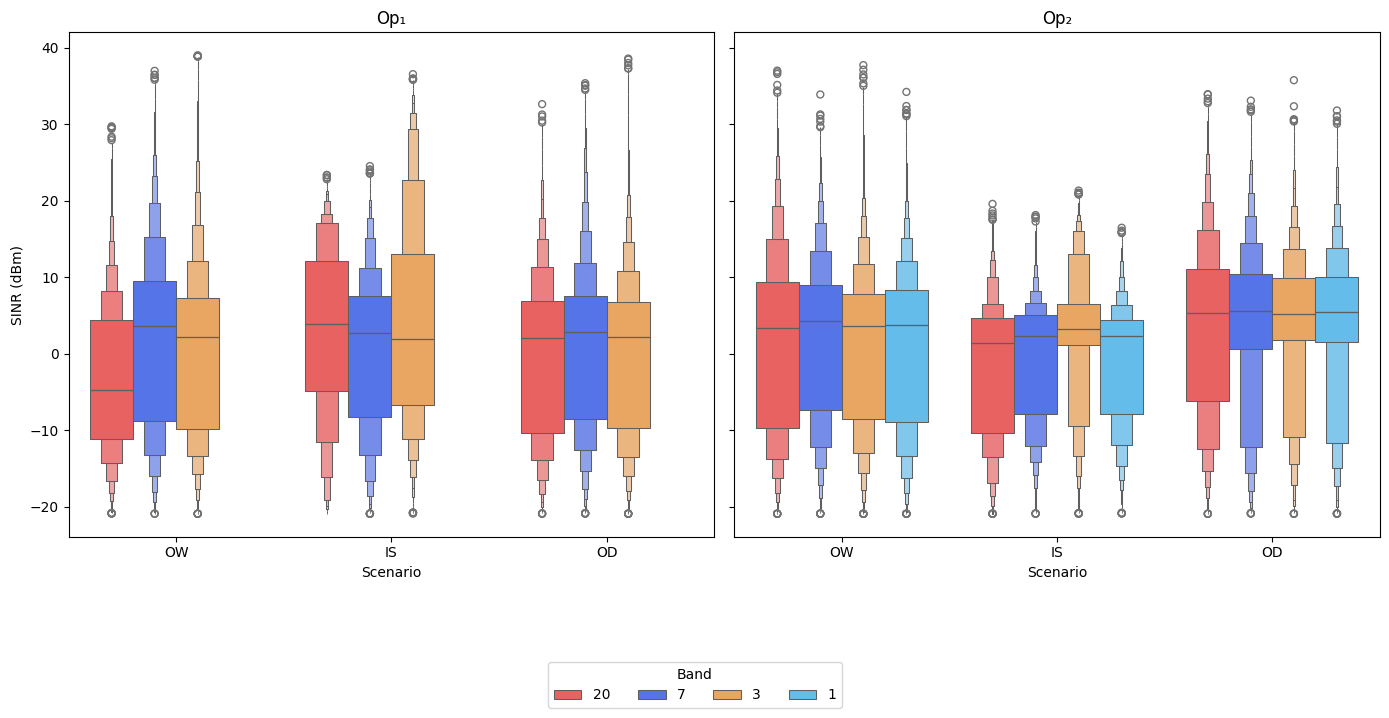

In [6]:
# Extract the numeric part of the MNC field by using string manipulation
fd_4g['MNC_numeric'] = fd_4g['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
fd_4g['MNC_numeric'] = pd.to_numeric(fd_4g['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

hue_order = [20, 7, 3, 1]
# Set up the exact color palette, now including Band 1
palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Operator 1 (Op1)
sns.boxenplot(
    x='scenario',
    y='SINR',
    hue='Band',
    data=op1_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[0]
)
axes[0].set_title('Op₁')
axes[0].set_ylabel('SINR (dBm)')
axes[0].set_xlabel('Scenario')

# Remove the legend from this plot
axes[0].get_legend().remove()

# Plot for Operator 2 (Op2) - Note that Band 1 should now appear here
sns.boxenplot(
    x='scenario',
    y='SINR',
    hue='Band',
    data=op2_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[1]
)
axes[1].set_title('Op₂')
axes[1].set_ylabel('SINR (dBm)')
axes[1].set_xlabel('Scenario')

# Remove the legend from this plot as well
axes[1].get_legend().remove()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

# Set y-axis limits to match the scaling in your reference image

plt.tight_layout()
plt.show()

# RSRP (x-axis) and SINR (y-axis) for both operators, with color coding for different frequency bands. However, it looks like the data points are densely packed, making it a bit challenging to interpret at a glance

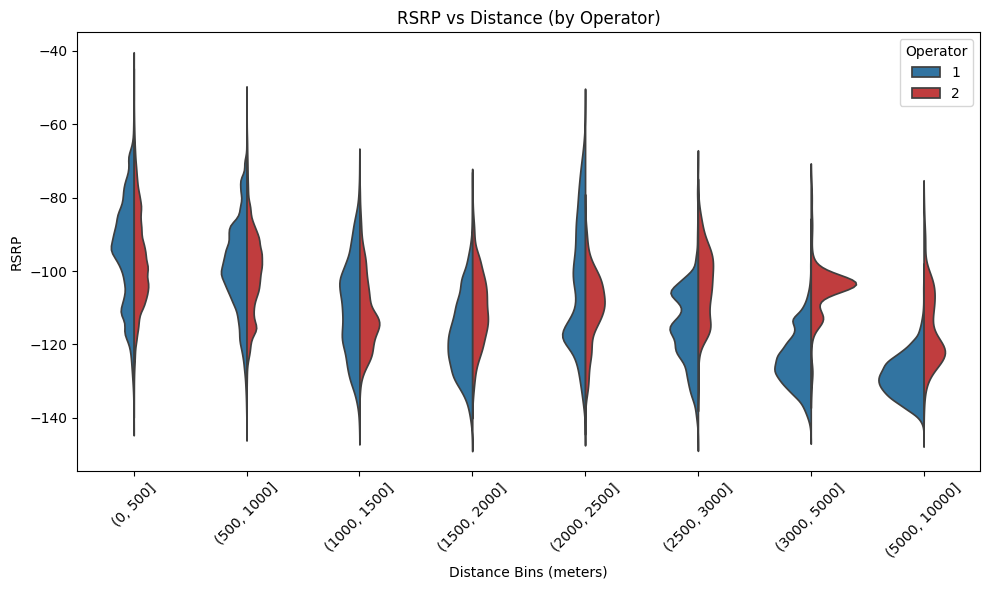

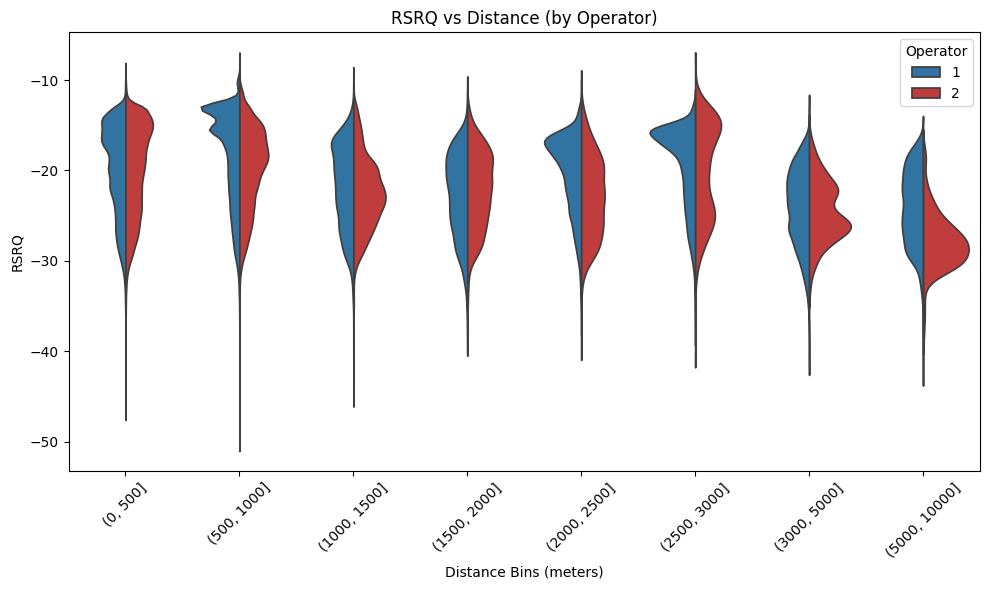

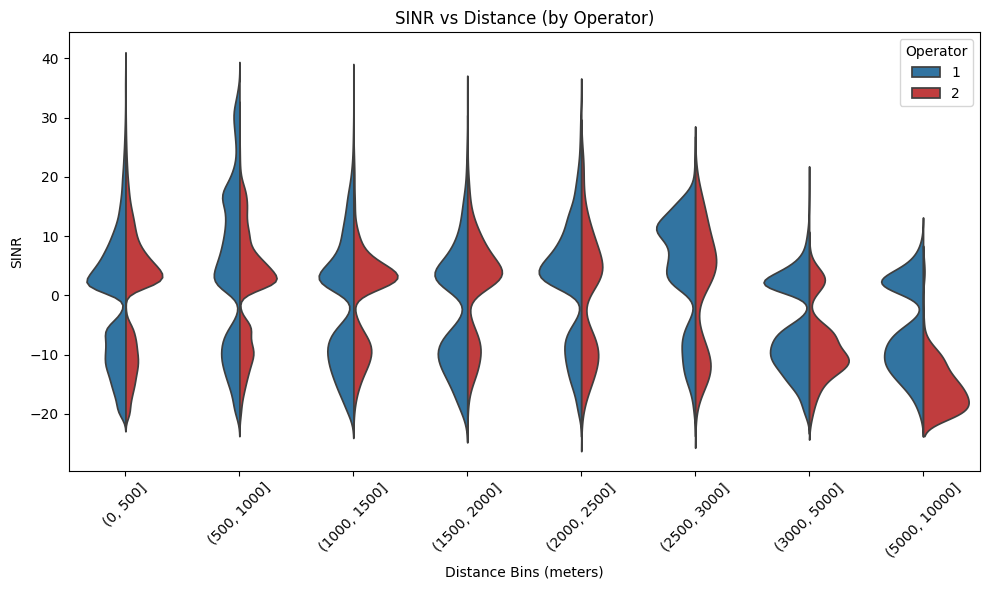

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ['SINR', 'RSRP', 'RSRQ', 'distance', 'Band', 'MNC_numeric']  # Adjust according to your dataset
filtered_data = fd_4g[columns_of_interest].dropna()

# Create distance bins
distance_bins = pd.cut(filtered_data['distance'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000])

# Add the distance bins to the dataset
filtered_data['distance_bin'] = distance_bins
# Custom palette for operators using integers
custom_palette = {1: "#1f77b4", 2: "#d62728"}  # Blue for Op₁, Red for Op₂

# Function to create violin plots with cleaner visuals
def plot_violin(metric):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='distance_bin', y=metric, hue='MNC_numeric', data=filtered_data, palette=custom_palette, split=True, inner=None)  # Removed the black box plot inside
    plt.title(f'{metric} vs Distance (by Operator)')
    plt.xlabel('Distance Bins (meters)')
    plt.ylabel(metric)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Operator')
    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin('RSRP')

# Plot for RSRQ
plot_violin('RSRQ')

# Plot for SINR
plot_violin('SINR')


# Distance vs SINR, RSRP, RSRQ

In [40]:
from matplotlib.colors import LinearSegmentedColormap

# Funciton definitions for generating differerent heatmaps

def categorize_distance(distance):
    if distance <= 500:
        return '0-500'
    elif distance <= 1000:
        return '500-1000'
    elif distance <= 3000:
        return '1000-3000'
    else:
        return '3000-5000'

def generate_heat_map(filtered_data, metric):

    # Group the data by distance_bucket and op_scenario, and calculate the mean RSRQ
    heatmap_data = filtered_data.groupby(['distance_bucket', 'op_scenario'], observed=False)[metric].median().unstack()

    # Create a custom colormap from the middle part of 'magma'
    magma_middle = LinearSegmentedColormap.from_list('inferno_middle', plt.cm.magma(np.linspace(0.1, 0.5, 256)))  # Using a section of the colormap

    # Plot the heatmap with the custom colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap=magma_middle, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': metric}, yticklabels=True )
     
    plt.title(f'Heatmap of {metric} by Distance and Operator/Scenario')
    plt.ylabel('Distance Buckets (m)', labelpad=20)
    plt.xlabel('Operator and Scenario')

    # Rotate X and Y axis labels
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=45)

    # Flip the Y-axis so smaller distances are on top
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()


def create_separate_heatmaps(filtered_data, metric):
    # Create a smaller figure with 2 subplots in one row (side by side) WITHOUT shared Y-axis
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # No sharey=True to keep independent Y-axes

    # Plot for Operator 1
    operator_1_data = filtered_data[filtered_data['MNC_numeric'] == 1]
    heatmap_data_1 = operator_1_data.groupby(['distance_bucket', 'scenario'], observed=False)[metric].median().unstack()

    # Create a custom colormap from the middle part of 'magma'
    magma_middle = LinearSegmentedColormap.from_list('magma_middle', plt.cm.magma(np.linspace(0.1, 0.5, 256)))  # Using a section of the colormap
    
    # Plot the heatmap for Operator 1
    sns.heatmap(heatmap_data_1, cmap=magma_middle, annot=True, fmt=".2f", linewidths=.5, 
                cbar_kws={'label': metric}, yticklabels=True, ax=axes[0])

    # Customize the plot for Operator 1
    axes[0].set_title(f'Heatmap of {metric} for Operator 1')
    axes[0].set_xlabel('Scenario')
    axes[0].set_ylabel('Distance Buckets (m)', labelpad=30)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].tick_params(axis='y', rotation=45)
    axes[0].invert_yaxis()  # Reverse the Y-axis so smaller distances appear at the top
    
    # Plot for Operator 2
    operator_2_data = filtered_data[filtered_data['MNC_numeric'] == 2]
    heatmap_data_2 = operator_2_data.groupby(['distance_bucket', 'scenario'], observed=False)[metric].median().unstack()

    # Plot the heatmap for Operator 2
    sns.heatmap(heatmap_data_2, cmap=magma_middle, annot=True, fmt=".2f", linewidths=.5, 
                cbar_kws={'label': metric}, yticklabels=True, ax=axes[1])

    # Customize the plot for Operator 2
    axes[1].set_title(f'Heatmap of {metric} for Operator 2')
    axes[1].set_xlabel('Scenario')
    #axes[1].set_ylabel('Distance Buckets (m)', labelpad=30)  # Enable Y-axis labels for the second plot
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='y', rotation=45)
    axes[1].invert_yaxis()  # Reverse the Y-axis so smaller distances appear at the top
    
    # Increase the space between the two subplots
    plt.subplots_adjust(wspace=0.6)  # Increase the space between the plots

    # Adjust layout to ensure no overlap
    plt.tight_layout()
    plt.show()

In [41]:
# Step 1: Select the columns of interest
columns_of_interest = ['SINR', 'RSRP', 'RSRQ', 'distance', 'Band', 'Frequency', 'MNC_numeric', 'scenario', 'campaign']
filtered_data = fd_4g[columns_of_interest].dropna()

# Step 3: Apply the distance categorization to the filtered data
filtered_data['distance_bucket'] = filtered_data['distance'].apply(categorize_distance)

# Group by both 'distance_bucket' and 'MNC_numeric' (operator), and count the number of data points
bucket_operator_counts = filtered_data.groupby(['distance_bucket', 'MNC_numeric']).size().unstack()

# Display the result
#print(bucket_operator_counts.sort_index(key=lambda x: x.str.extract('(\d+)', expand=False).astype(int)))
#print('Looks like the data is not balanced. op2 seems to have more data in the 0-500m range while op1 has more data in the larger buckets.')
# Step 4: Order the distance buckets correctly using pd.Categorical
distance_order = ['0-500', '500-1000', '1000-3000', '3000-5000']

filtered_data['distance_bucket'] = pd.Categorical(filtered_data['distance_bucket'], categories=distance_order, ordered=True)

# Step 5: Create a new column that combines operator (MNC_numeric) and scenario, and append 'op' to the operator
filtered_data['op_scenario'] = 'op' + filtered_data['MNC_numeric'].astype(str) + ' (' + filtered_data['scenario'] + ')'


## Op1 & Op2 Combined (in the same heatmap)

### SINR

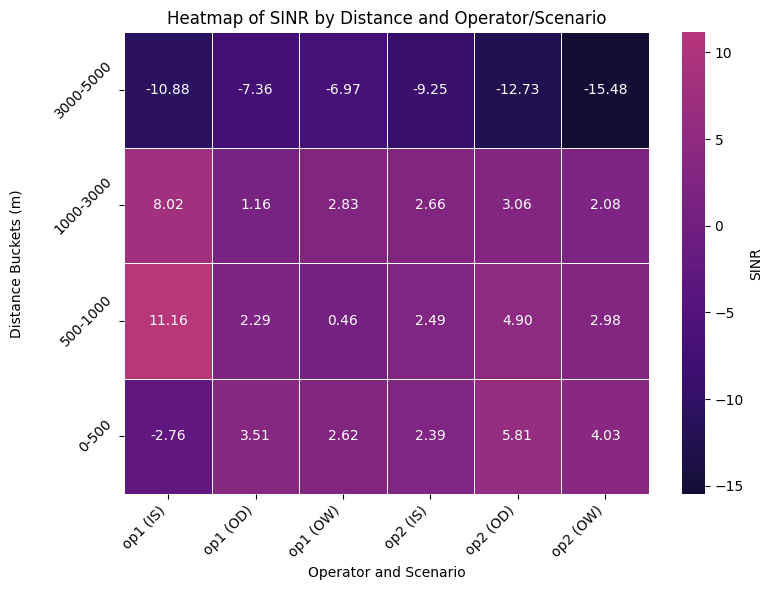

In [42]:
generate_heat_map(filtered_data=filtered_data, metric='SINR')

### RSRP

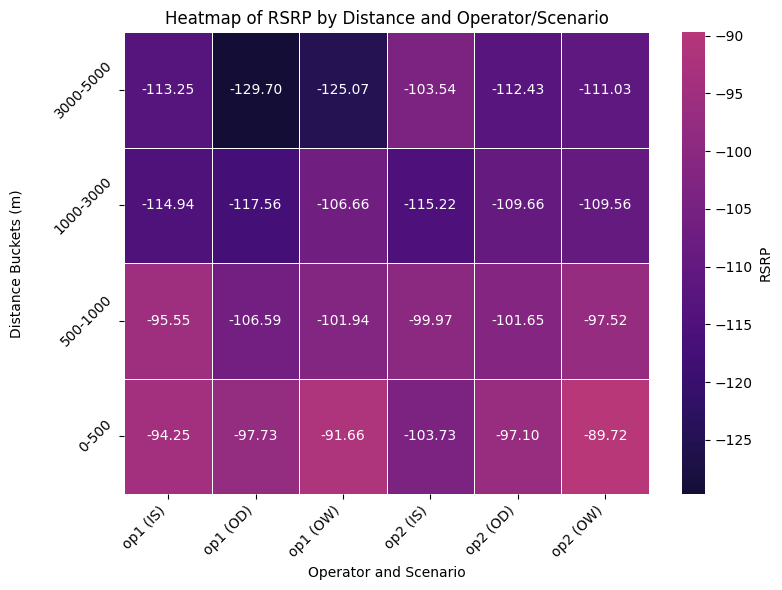

In [43]:
generate_heat_map(filtered_data=filtered_data, metric='RSRP')

### RSRQ

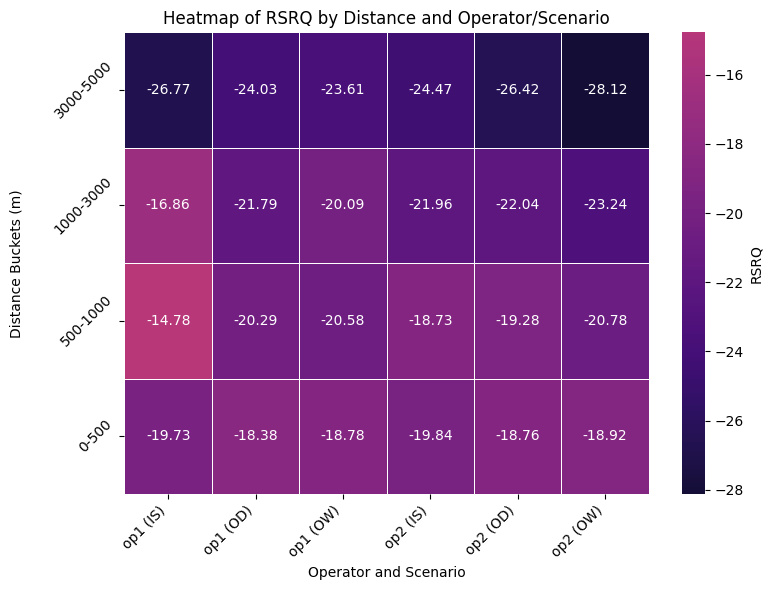

In [44]:
generate_heat_map(filtered_data=filtered_data, metric='RSRQ')

## Op1 & Op2 Seperate (each get their own heatmaps)

### SINR

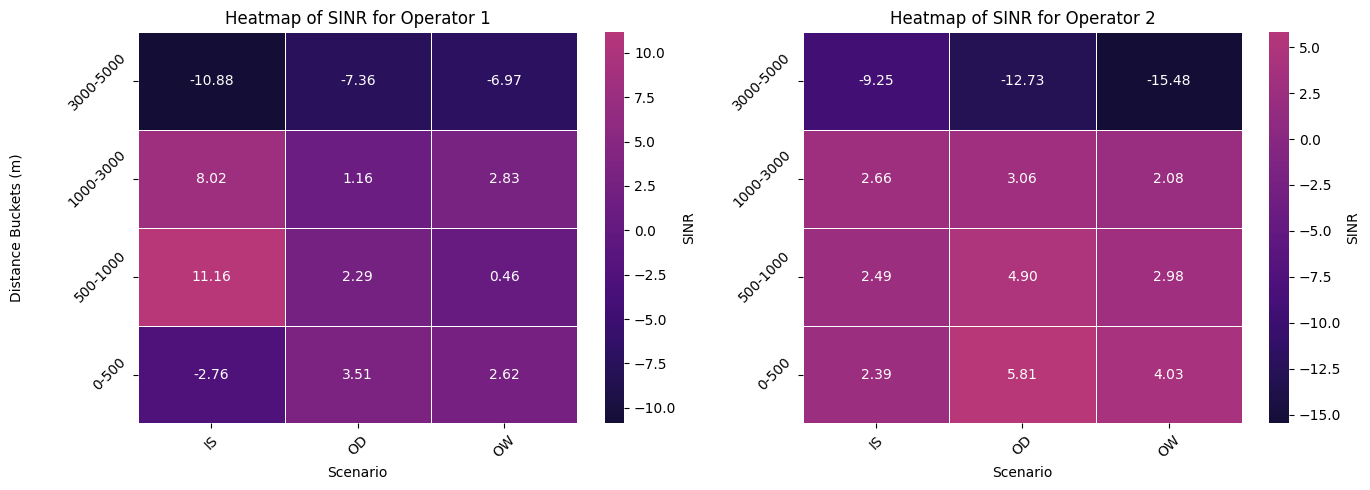

In [45]:
create_separate_heatmaps(filtered_data=filtered_data, metric='SINR')

### RSRP

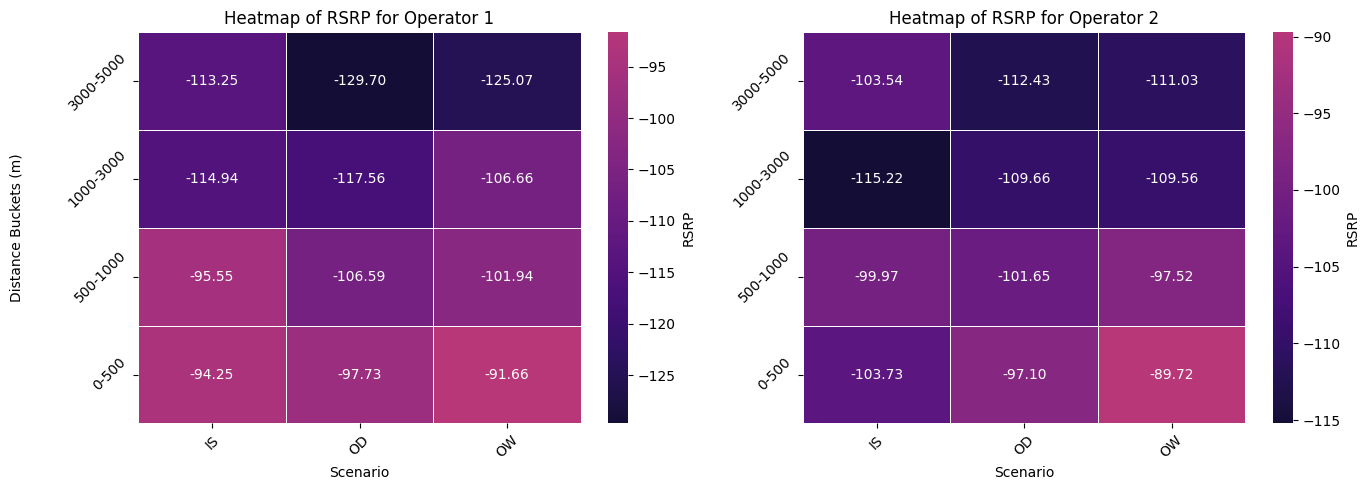

In [46]:
create_separate_heatmaps(filtered_data=filtered_data, metric='RSRP')

### RSRQ

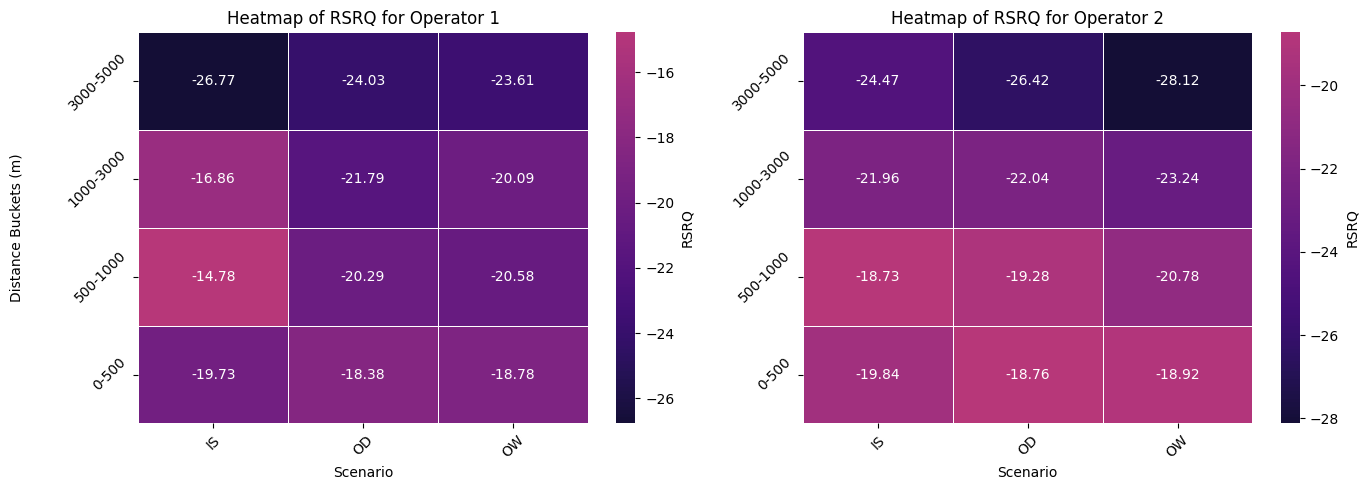

In [47]:
create_separate_heatmaps(filtered_data=filtered_data, metric='RSRQ')

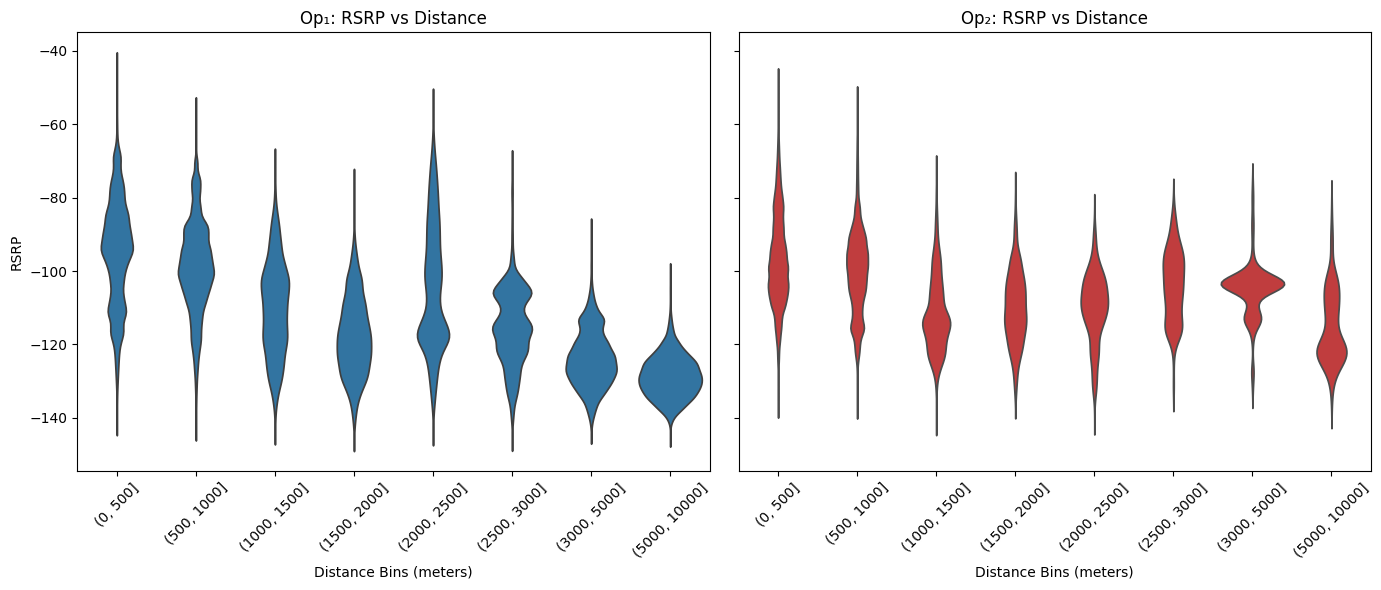

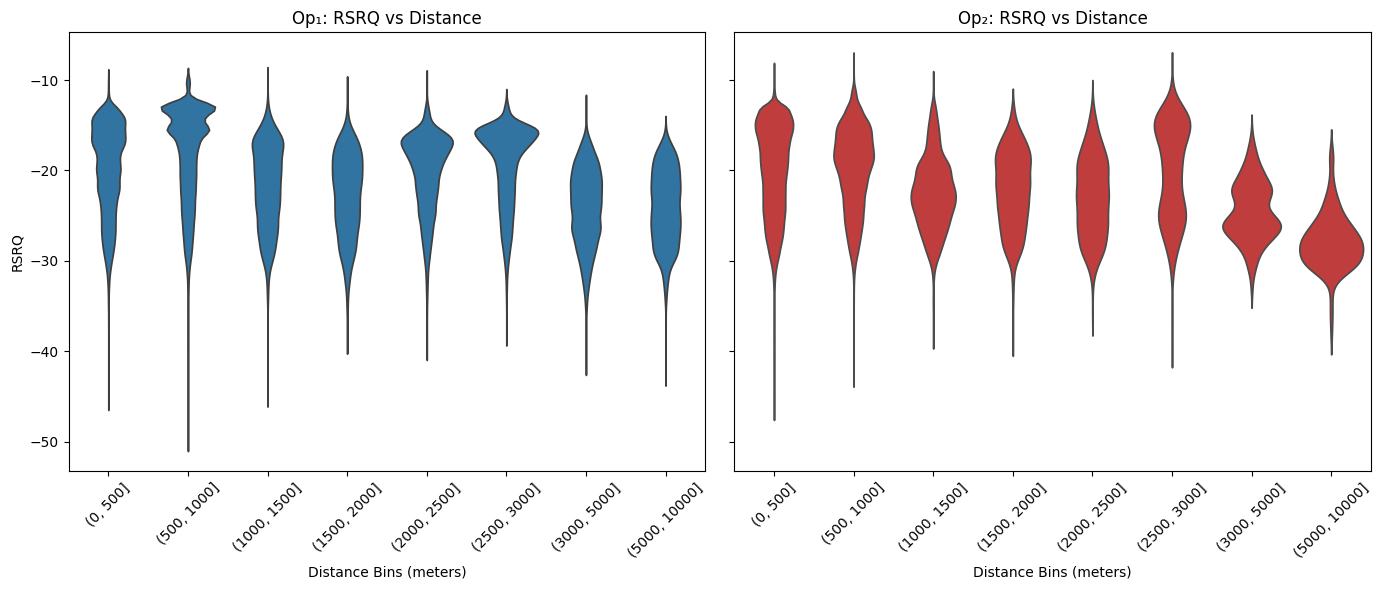

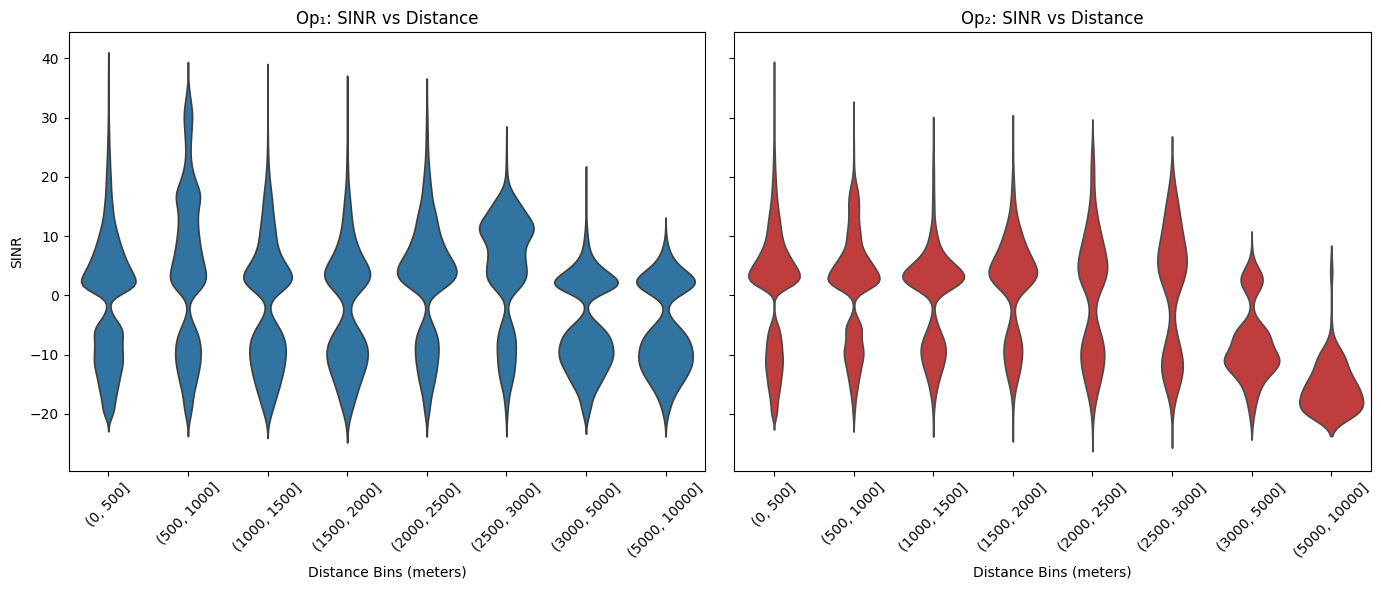

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create distance bins
distance_bins = pd.cut(filtered_data['distance'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000])

# Add the distance bins to the dataset
filtered_data['distance_bin'] = distance_bins

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (meters)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)  # Correct rotation without set_xticklabels

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (meters)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)  # Correct rotation without set_xticklabels

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')


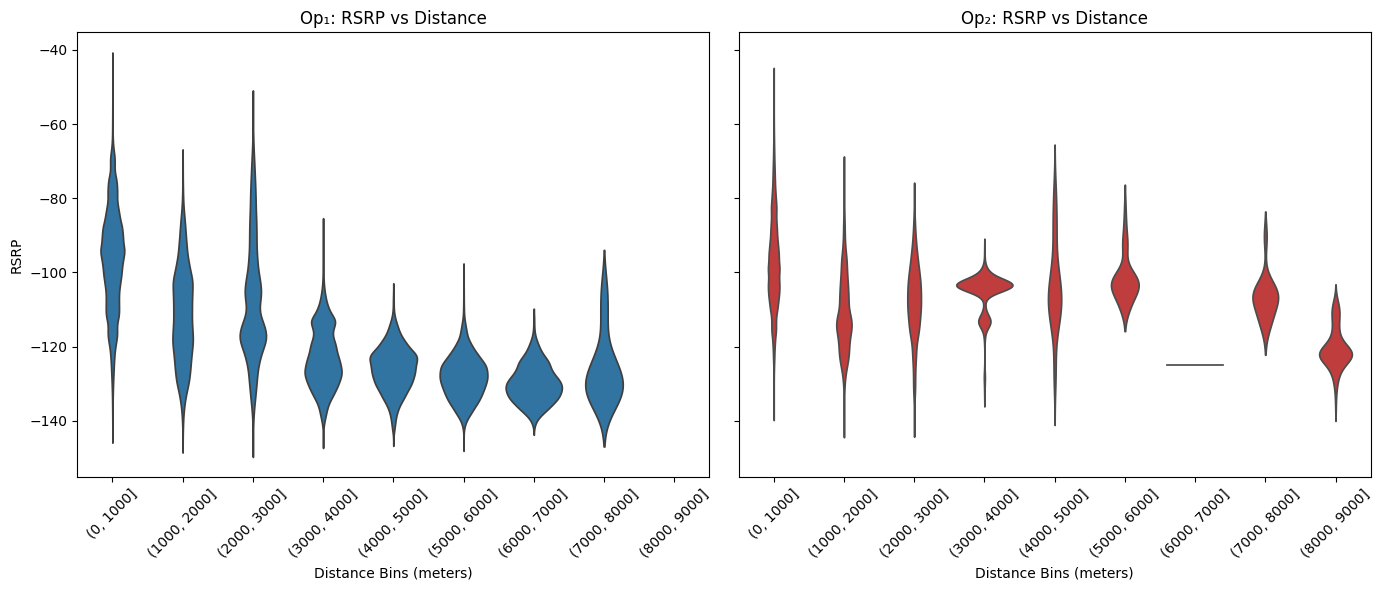

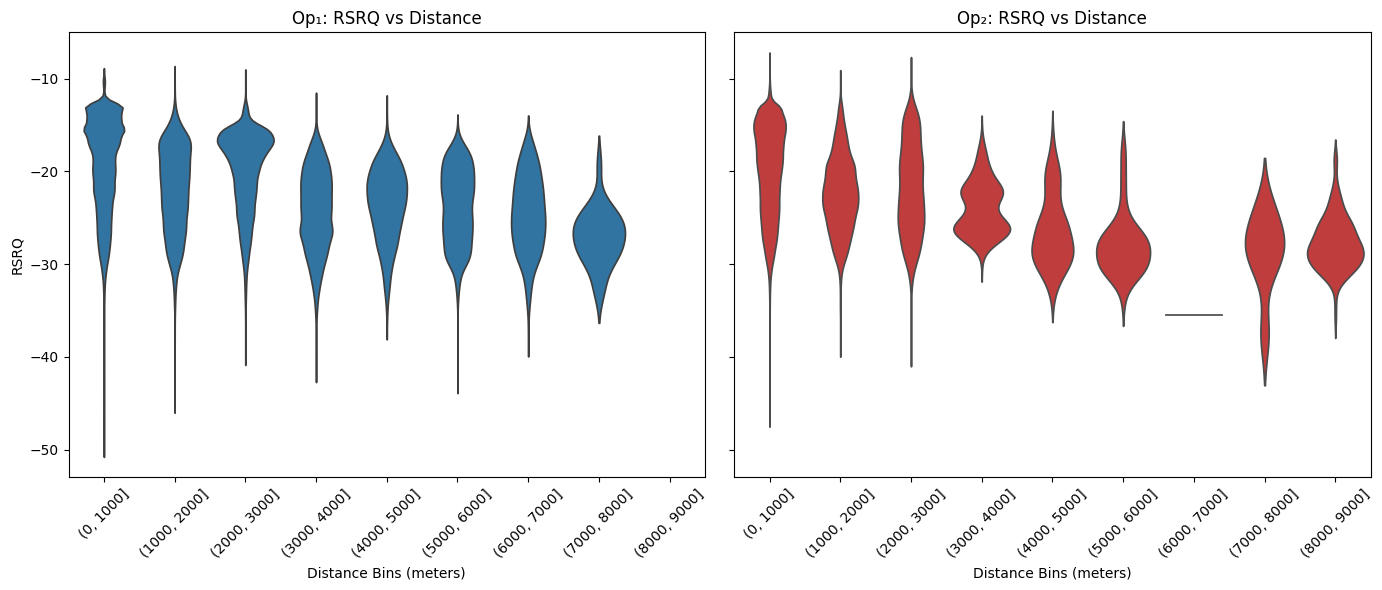

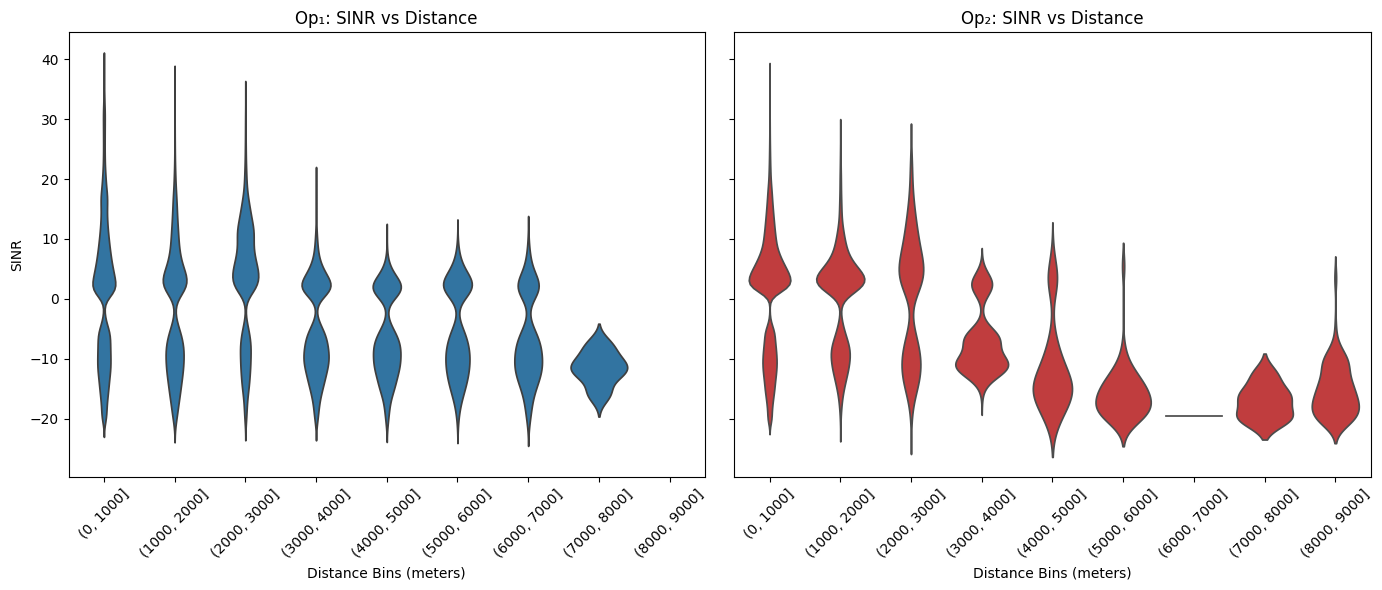

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example of fixed-width bins (you can adjust the bins as needed)
distance_bins = pd.cut(filtered_data['distance'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])

# Or, use quantile-based bins for a more balanced distribution
# distance_bins = pd.qcut(filtered_data['distance'], q=8)

# Add the distance bins to the dataset
filtered_data['distance_bin'] = distance_bins

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (meters)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (meters)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')


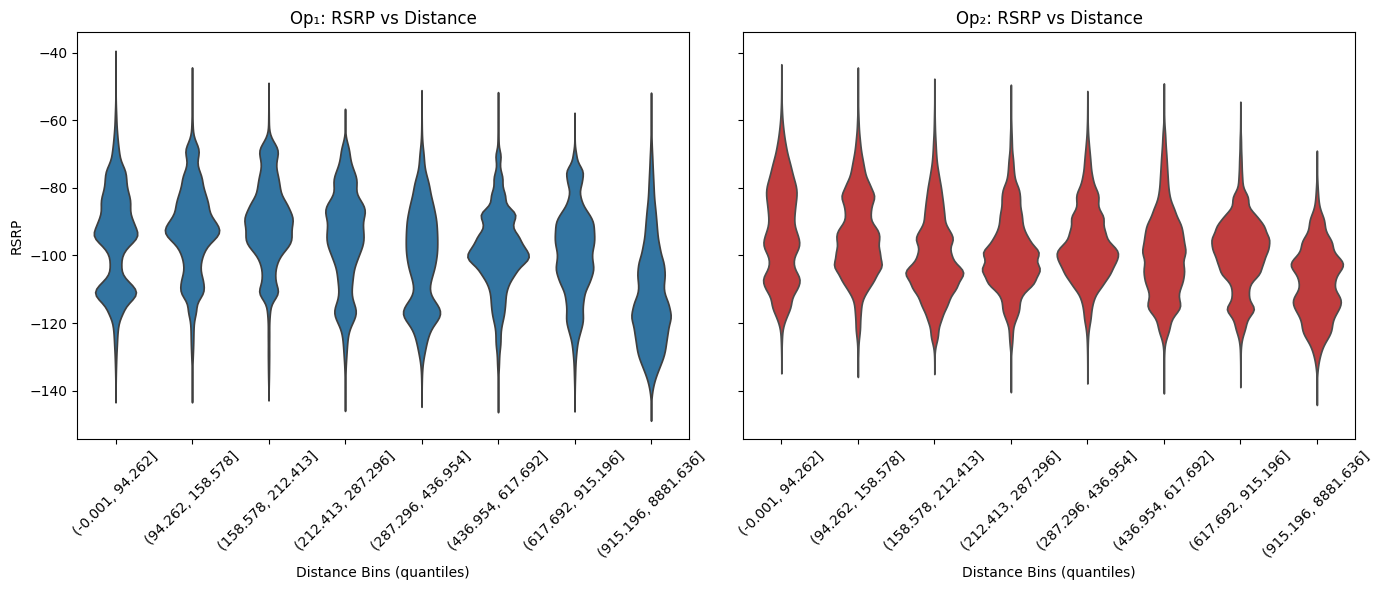

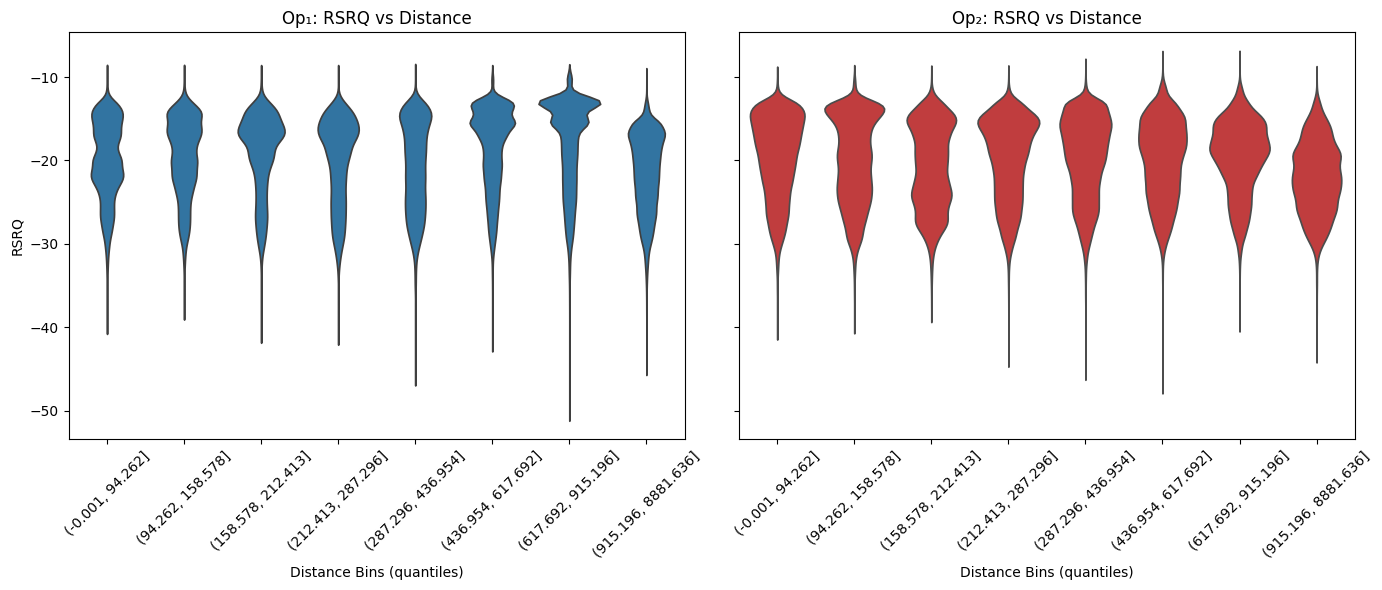

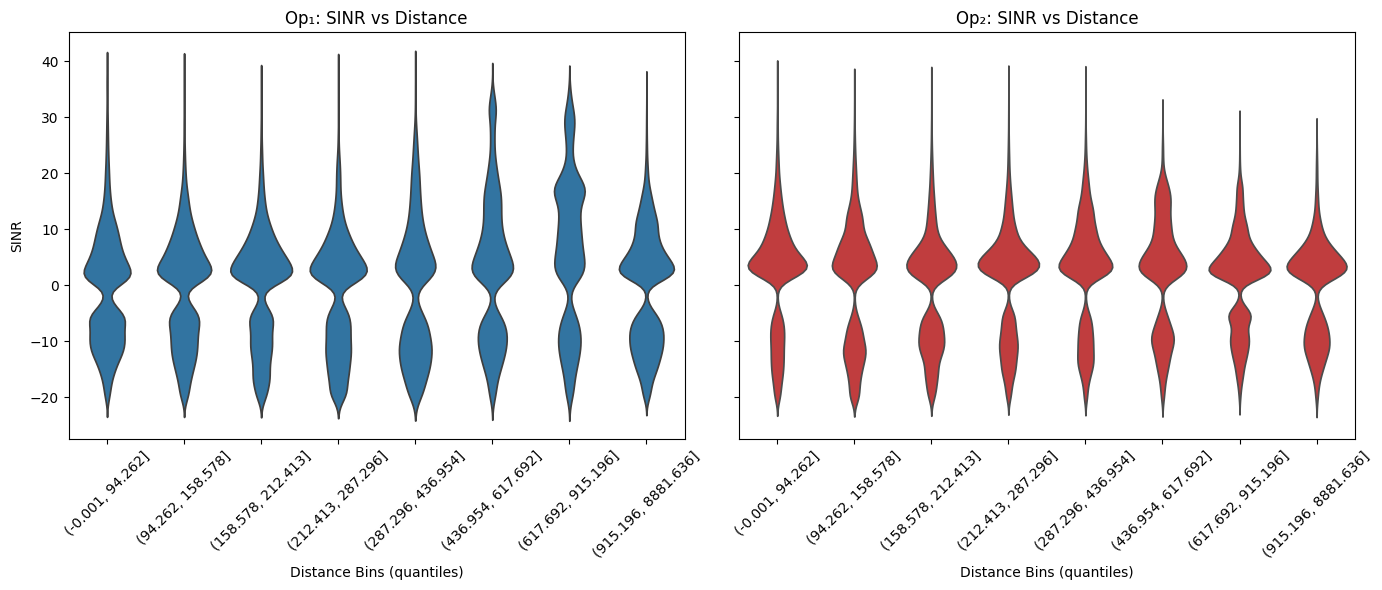

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create quantile-based distance bins with equal number of observations in each bin
distance_bins = pd.qcut(filtered_data['distance'], q=8)  # Here, q=8 creates 8 bins
filtered_data['distance_bin'] = distance_bins

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (quantiles)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (quantiles)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')


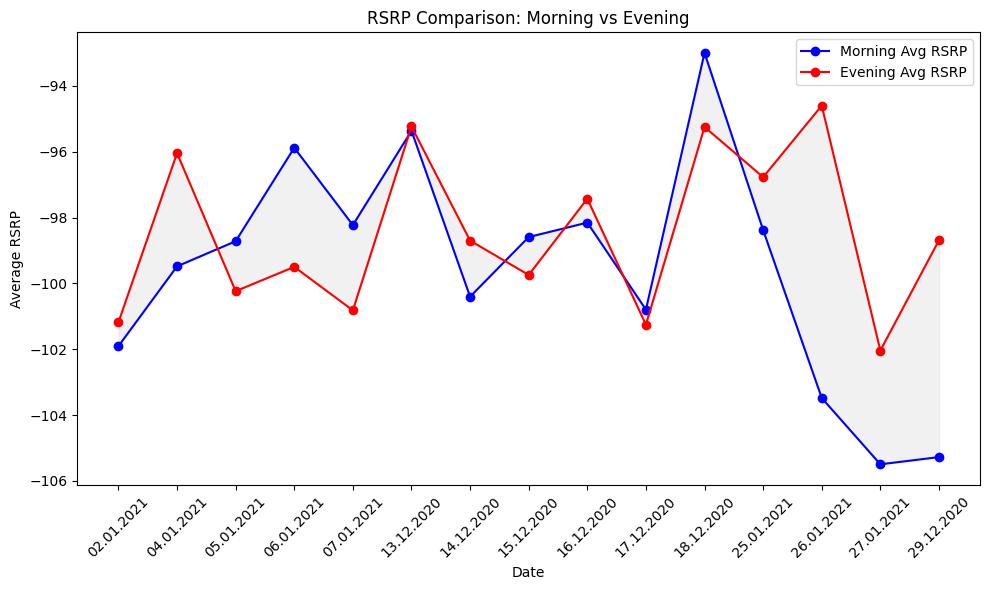

In [20]:
# Assuming your dataset is loaded into 'fd_4g'
# Example: Convert 'Time' column to datetime object with milliseconds
fd_4g['Time'] = pd.to_datetime(fd_4g['Time'], format='%H:%M:%S.%f')

# Filter morning and evening data
morning_data = fd_4g[fd_4g['Time'].dt.hour < 12]  # Morning: 00:00 to 12:00
evening_data = fd_4g[fd_4g['Time'].dt.hour >= 12] # Evening: 12:00 to 24:00

# Group data by 'Date' and calculate the average RSRP for each part of the day
morning_avg_rsrp = morning_data.groupby('Date')['RSRP'].mean().reset_index(name='Morning_Avg_RSRP')
evening_avg_rsrp = evening_data.groupby('Date')['RSRP'].mean().reset_index(name='Evening_Avg_RSRP')

# Merge the morning and evening data
merged_data = pd.merge(morning_avg_rsrp, evening_avg_rsrp, on='Date')

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Date'], merged_data['Morning_Avg_RSRP'], label='Morning Avg RSRP', color='blue', marker='o')
plt.plot(merged_data['Date'], merged_data['Evening_Avg_RSRP'], label='Evening Avg RSRP', color='red', marker='o')
plt.fill_between(merged_data['Date'], merged_data['Morning_Avg_RSRP'], merged_data['Evening_Avg_RSRP'], color='lightgray', alpha=0.3)

plt.title('RSRP Comparison: Morning vs Evening')
plt.xlabel('Date')
plt.ylabel('Average RSRP')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# New Idea:
- lets take All the Indoor campaigns and profile the results per time.


# Attempt at Temporal and Positional analysis

# New 10/11/2024


In [21]:
data = fd_4g

# Extract the numeric part of the MNC field by using string manipulation
data['MNC_numeric'] = data['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
data['MNC_numeric'] = pd.to_numeric(data['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = data[data['MNC_numeric'] == 1]  # Operator 1
op2_data = data[data['MNC_numeric'] == 2]  # Opeurator 2


# Group the data by eNodeB.ID and count the number of measurements for each eNodeB
enodeb_counts_op1 = op1_data.groupby('eNodeB.ID').size().reset_index(name='measurement_count')
enodeb_counts_op2 = op2_data.groupby('eNodeB.ID').size().reset_index(name='measurement_count')

# Sort by measurement_count to find the eNodeBs with the most measurements
top_enodebs_op1 = enodeb_counts_op1.sort_values(by='measurement_count', ascending=False).head(10)
top_enodebs_op2 = enodeb_counts_op2.sort_values(by='measurement_count', ascending=False).head(10)

# Display the top 10 eNodeBs with the most measurements for both operator 1 and operator 2
#print(f'Operator 1 Data: \n {top_enodebs_op1}')
#print(f'Operator 2 Data: \n {top_enodebs_op2}')

In [22]:
# Get the eNodeB.ID with the most measurements
most_measured_enodeb = top_enodebs_op1.iloc[0]['eNodeB.ID']
# Filter the data for this specific eNodeB.ID
most_measured_data = op1_data[op1_data['eNodeB.ID'] == most_measured_enodeb]

In [23]:
import folium
from folium.plugins import HeatMap
import numpy as np

# Get the eNodeB.ID with the most measurements
most_measured_enodeb = top_enodebs_op1.iloc[0]['eNodeB.ID']

# Filter the data for this specific eNodeB.ID and drop any rows with NaN values in relevant columns
most_measured_data = op1_data[op1_data['eNodeB.ID'] == most_measured_enodeb].dropna(subset=['Latitude', 'Longitude', 'SINR'])

# Create a map centered around the eNodeB's location with simpler background (CartoDB Positron)
map_center = [most_measured_data.iloc[0]['cellLatitude'], most_measured_data.iloc[0]['cellLongitude']]
m = folium.Map(location=map_center, zoom_start=13, tiles='CartoDB positron')

# Add a marker for the eNodeB itself (the base station)
folium.Marker(
    location=[most_measured_data.iloc[0]['cellLatitude'], most_measured_data.iloc[0]['cellLongitude']],
    popup=f"eNodeB ID: {most_measured_enodeb}",
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

# Prepare data for heatmap [latitude, longitude, SINR]
heat_data = [[row['Latitude'], row['Longitude'], row['SINR']] for index, row in most_measured_data.iterrows()]

# Adjust the heatmap settings for better visualization
HeatMap(heat_data, min_opacity=0.3, radius=25, blur=15, max_zoom=1, gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'lime', 0.8: 'yellow', 1.0: 'red'}).add_to(m)

# Display the map

#We dont display the map because it takes too much size
#m


In [27]:
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import base64
from io import BytesIO

# Generate the color bar image and return it as a base64 string
def create_colorbar_base64(cmap, vmin, vmax):
    fig, ax = plt.subplots(figsize=(1.5, 6))  # Increase the size (width=1.5, height=6 for better visibility)
    norm = Normalize(vmin=vmin, vmax=vmax)
    fig.subplots_adjust(right=0.5)
    
    # Create the colorbar
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='vertical')
    cb1.set_label('RSRP', fontsize=12)  # Adjust the label font size
    
    # Save the image to a BytesIO object
    img = BytesIO()
    plt.savefig(img, format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)  # Save at higher dpi for quality
    plt.close()
    
    # Encode the image as base64
    img.seek(0)
    return base64.b64encode(img.read()).decode('utf-8')

# Get the SINR values for the min and max range
vmin = most_measured_data['RSRP'].min()
vmax = most_measured_data['RSRP'].max()

# Generate the base64 color bar image
colorbar_base64 = create_colorbar_base64(plt.get_cmap('RdYlBu'), vmin, vmax)

# Create a folium map centered on the eNodeB
map_center = [most_measured_data.iloc[0]['cellLatitude'], most_measured_data.iloc[0]['cellLongitude']]
m = folium.Map(location=map_center, zoom_start=13, tiles='CartoDB positron')

# Add a marker for the eNodeB itself
folium.Marker(location=map_center, popup=f"eNodeB ID: {most_measured_enodeb}", icon=folium.Icon(color='red')).add_to(m)

# Normalize SINR values to range between 0 and 1 for color mapping
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('RdYlBu')

# Add CircleMarkers for SINR measurements
for idx, row in most_measured_data.iterrows():
    sinr_normalized = norm(row['RSRP'])  # Normalize SINR value
    color = mpl.colors.to_hex(cmap(sinr_normalized))  # Get the color from the colormap

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=f"RSRP: {row['RSRP']:.2f}"
    ).add_to(m)

# Add a continuous colorbar as an overlay using base64 image, moved to the right
colorbar_html = f"""
<div style="position: fixed;
            bottom: 50px; right: 50px; width: 60px; height: 300px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            ">
            <img src="data:image/png;base64,{colorbar_base64}" style="width:60px;height:300px;">
</div>
"""
m.get_root().html.add_child(folium.Element(colorbar_html))

# Display the map
#m
